In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


array([<AxesSubplot:ylabel='policy_state'>], dtype=object)

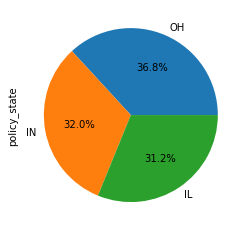

In [6]:
df.loc[df['fraud_reported']=='Y']['policy_state'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')

array([<AxesSubplot:ylabel='fraud_reported'>], dtype=object)

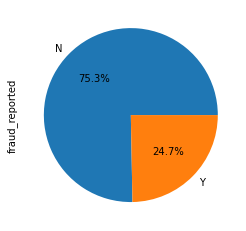

In [10]:
# Prevalence ratio of Fraud_reported
df['fraud_reported'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')
# Out of 1000 25% of the insurance claims are False claims

array([<AxesSubplot:ylabel='age'>], dtype=object)

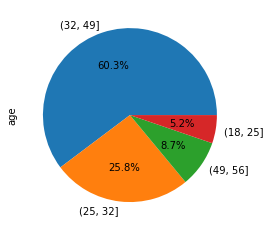

In [19]:
# Why False Claims
pd.cut(df.loc[df['fraud_reported']=='Y']['age'],[18,25,32,49,56]).value_counts().plot.pie(subplots=True,autopct='%1.1f%%')
# 60% of the False Claims is reported between the age of 32 and 49

<AxesSubplot:>

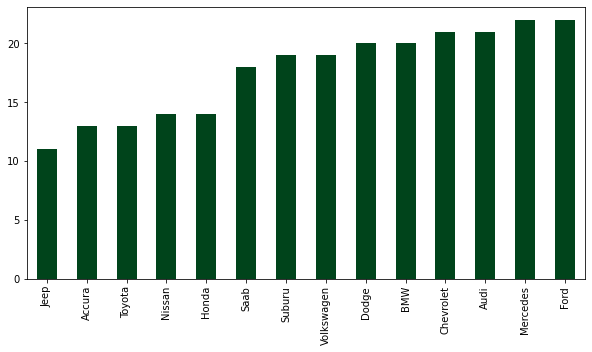

In [27]:
df.groupby(['fraud_reported']).get_group('Y')['auto_make'].value_counts().sort_values().plot.bar(cmap='BuGn_r',figsize=(10,5))

<AxesSubplot:>

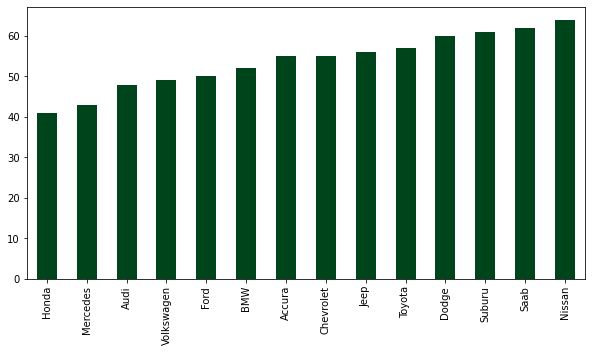

In [28]:
df.groupby(['fraud_reported']).get_group('N')['auto_make'].value_counts().sort_values().plot.bar(cmap='BuGn_r',figsize=(10,5))

In [30]:
df.groupby(['fraud_reported']).get_group('Y').mean()

C:\Users\ajay\AppData\Local\Temp/ipykernel_20240/3139905143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby(['fraud_reported']).get_group('Y').mean()


months_as_customer             2.080810e+02
age                            3.914170e+01
policy_number                  5.330302e+05
policy_deductable              1.151822e+03
policy_annual_premium          1.250236e+03
umbrella_limit                 1.336032e+06
insured_zip                    5.036380e+05
capital-gains                  2.419352e+04
capital-loss                  -2.752267e+04
incident_hour_of_the_day       1.169636e+01
number_of_vehicles_involved    1.931174e+00
bodily_injuries                1.040486e+00
witnesses                      1.582996e+00
total_claim_amount             6.030211e+04
injury_claim                   8.208340e+03
property_claim                 8.560121e+03
vehicle_claim                  4.353364e+04
auto_year                      2.005186e+03
_c39                                    NaN
dtype: float64

<AxesSubplot:>

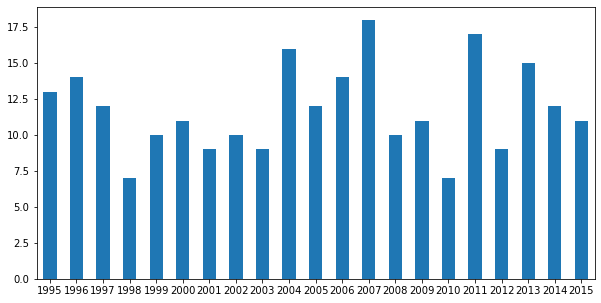

In [36]:
df.groupby(['fraud_reported']).get_group('Y')['auto_year'].value_counts().sort_index().plot.bar(figsize=(10,5),rot=0)

<AxesSubplot:>

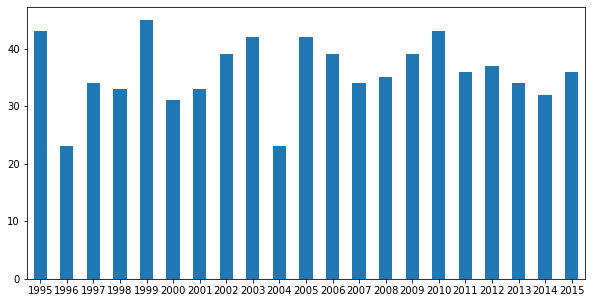

In [37]:
df.groupby(['fraud_reported']).get_group('N')['auto_year'].value_counts().sort_index().plot.bar(figsize=(10,5),rot=0)

array([<AxesSubplot:ylabel='police_report_available'>], dtype=object)

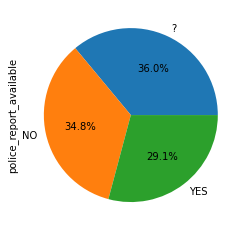

In [42]:
df.loc[(df['fraud_reported']=='Y')]['police_report_available'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')

array([<AxesSubplot:ylabel='police_report_available'>], dtype=object)

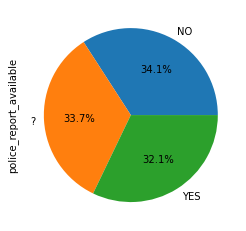

In [43]:
df.loc[(df['fraud_reported']=='N')]['police_report_available'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')

array([<AxesSubplot:ylabel='fraud_reported'>], dtype=object)

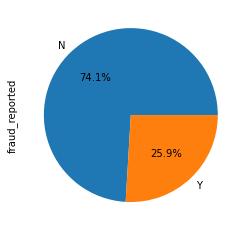

In [48]:
df.groupby(['police_report_available']).get_group('?')['fraud_reported'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')

In [50]:
df.groupby(['fraud_reported']).get_group('Y')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,16-05-1990,IN,100/300,500,951.56,0,455426,...,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y,NaN
977,266,42,929306,06-03-2003,IN,100/300,500,1093.83,4000000,468454,...,NO,53280,4440,8880,39960,Suburu,Impreza,2015,Y,NaN
982,230,43,490514,09-02-2007,IN,500/1000,2000,1101.83,0,451529,...,YES,51900,5190,10380,36330,BMW,M5,2011,Y,NaN
986,232,42,182953,30-04-2013,IN,100/300,500,944.03,0,440153,...,?,77000,15400,7700,53900,Toyota,Highlander,2015,Y,NaN


In [51]:
df.groupby(['fraud_reported']).get_group('N')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [52]:
df['Claim_per']=df['total_claim_amount']/df['total_claim_amount']
df['injury_per']=df['injury_claim']/df['total_claim_amount']
df['property_per']=df['property_claim']/df['total_claim_amount']
df['vehicle_per']=df['vehicle_claim']/df['total_claim_amount']
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Claim_per,injury_per,property_per,vehicle_per
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,1.0,0.090909,0.181818,0.727273
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,1.0,0.153846,0.153846,0.692308
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,1.0,0.222222,0.111111,0.666667
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,NaN,1.0,0.100000,0.100000,0.800000
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,NaN,1.0,0.200000,0.100000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,61040,Honda,Accord,2006,N,NaN,1.0,0.200000,0.100000,0.700000
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,72320,Volkswagen,Passat,2015,N,NaN,1.0,0.166667,0.166667,0.666667
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,52500,Suburu,Impreza,1996,N,NaN,1.0,0.111111,0.111111,0.777778
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,36540,Audi,A5,1998,N,NaN,1.0,0.111111,0.111111,0.777778


In [57]:
df.groupby(['police_report_available','fraud_reported']).agg({'property_per':'mean','injury_per':'mean','vehicle_per':"mean"}).unstack()

property_per           injury_per            \
fraud_reported                     N         Y          N         Y   
police_report_available                                               
?                           0.140849  0.137445   0.141822  0.134162   
NO                          0.137176  0.144916   0.138318  0.132666   
YES                         0.135196  0.141736   0.143023  0.134842   

                        vehicle_per            
fraud_reported                    N         Y  
police_report_available                        
?                          0.717329  0.728392  
NO                         0.724506  0.722418  
YES                        0.721781  0.723422

In [58]:
df=df.round(3)

In [59]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39,Claim_per,injury_per,property_per,vehicle_per
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,...,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN,NaN,0.030481,-0.035115,0.002828
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,...,0.069863,0.075522,0.060898,0.062588,0.001354,NaN,NaN,0.042316,0.001922,-0.036373
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,...,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN,NaN,0.004345,-0.008155,0.002851
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,...,0.022839,0.039107,0.064792,0.005269,0.026105,NaN,NaN,0.019161,0.077916,-0.077587
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,...,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN,NaN,-0.046264,-0.003689,0.041125
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,...,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN,NaN,-0.013381,0.014834,-0.000627
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,...,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN,NaN,-0.000463,0.021174,-0.016392
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,...,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN,NaN,0.000580,-0.010439,0.007966
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,...,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN,NaN,-0.035206,-0.000030,0.029221
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,...,0.217702,0.165768,0.179536,0.215626,0.021368,NaN,NaN,-0.005212,0.010514,-0.003884


In [63]:
df.iloc[:,:-9].mean()

C:\Users\ajay\AppData\Local\Temp/ipykernel_20240/915394175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,:-9].mean()


months_as_customer             2.039540e+02
age                            3.894800e+01
policy_number                  5.462386e+05
policy_deductable              1.136000e+03
policy_annual_premium          1.256406e+03
umbrella_limit                 1.101000e+06
insured_zip                    5.012145e+05
capital-gains                  2.512610e+04
capital-loss                  -2.679370e+04
incident_hour_of_the_day       1.164400e+01
number_of_vehicles_involved    1.839000e+00
bodily_injuries                9.920000e-01
witnesses                      1.487000e+00
total_claim_amount             5.276194e+04
injury_claim                   7.433420e+03
property_claim                 7.399570e+03
vehicle_claim                  3.792895e+04
dtype: float64

In [68]:
df.groupby(['fraud_reported']).get_group('Y').loc[:,['bodily_injuries','witnesses']].value_counts()

bodily_injuries  witnesses
2                1            33
0                2            27
1                2            25
2                3            23
                 2            22
0                0            19
1                0            19
                 3            19
0                3            18
                 1            16
1                1            14
2                0            12
dtype: int64

In [74]:
from sklearn.preprocessing import OrdinalEncoder,LabelBinarizer
df['policy_state']=OrdinalEncoder().fit_transform(df['policy_state'].to_numpy()[:,np.newaxis])

In [76]:
df['fraud_reported']=LabelBinarizer().fit_transform(df['fraud_reported'])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Claim_per,injury_per,property_per,vehicle_per
0,328,48,521585,17-10-2014,2.0,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,1,NaN,1.0,0.091,0.182,0.727
1,228,42,342868,27-06-2006,1.0,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,1,NaN,1.0,0.154,0.154,0.692
2,134,29,687698,06-09-2000,2.0,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,0,NaN,1.0,0.222,0.111,0.667
3,256,41,227811,25-05-1990,0.0,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,1,NaN,1.0,0.100,0.100,0.800
4,228,44,367455,06-06-2014,0.0,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,0,NaN,1.0,0.200,0.100,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2.0,500/1000,1000,1310.80,0,431289,...,61040,Honda,Accord,2006,0,NaN,1.0,0.200,0.100,0.700
996,285,41,186934,05-01-2014,0.0,100/300,1000,1436.79,0,608177,...,72320,Volkswagen,Passat,2015,0,NaN,1.0,0.167,0.167,0.667
997,130,34,918516,17-02-2003,2.0,250/500,500,1383.49,3000000,442797,...,52500,Suburu,Impreza,1996,0,NaN,1.0,0.111,0.111,0.778
998,458,62,533940,18-11-2011,0.0,500/1000,2000,1356.92,5000000,441714,...,36540,Audi,A5,1998,0,NaN,1.0,0.111,0.111,0.778


In [81]:
df['auto_make']=OrdinalEncoder().fit_transform(df['auto_make'].to_numpy()[:,np.newaxis])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Claim_per,injury_per,property_per,vehicle_per
0,328,48,521585,17-10-2014,2.0,250/500,1000,1406.91,0,466132,...,52080,10.0,92x,2004,1,NaN,1.0,0.091,0.182,0.727
1,228,42,342868,27-06-2006,1.0,250/500,2000,1197.22,5000000,468176,...,3510,8.0,E400,2007,1,NaN,1.0,0.154,0.154,0.692
2,134,29,687698,06-09-2000,2.0,100/300,2000,1413.14,5000000,430632,...,23100,4.0,RAM,2007,0,NaN,1.0,0.222,0.111,0.667
3,256,41,227811,25-05-1990,0.0,250/500,2000,1415.74,6000000,608117,...,50720,3.0,Tahoe,2014,1,NaN,1.0,0.100,0.100,0.800
4,228,44,367455,06-06-2014,0.0,500/1000,1000,1583.91,6000000,610706,...,4550,0.0,RSX,2009,0,NaN,1.0,0.200,0.100,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2.0,500/1000,1000,1310.80,0,431289,...,61040,6.0,Accord,2006,0,NaN,1.0,0.200,0.100,0.700
996,285,41,186934,05-01-2014,0.0,100/300,1000,1436.79,0,608177,...,72320,13.0,Passat,2015,0,NaN,1.0,0.167,0.167,0.667
997,130,34,918516,17-02-2003,2.0,250/500,500,1383.49,3000000,442797,...,52500,11.0,Impreza,1996,0,NaN,1.0,0.111,0.111,0.778
998,458,62,533940,18-11-2011,0.0,500/1000,2000,1356.92,5000000,441714,...,36540,1.0,A5,1998,0,NaN,1.0,0.111,0.111,0.778


In [82]:
df['auto_year']=OrdinalEncoder().fit_transform(df['auto_year'].to_numpy()[:,np.newaxis])

In [83]:
df['police_report_available']=OrdinalEncoder().fit_transform(df['police_report_available'].to_numpy()[:,np.newaxis])

In [85]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'Claim_per',
       'injury_per', 'property_per', 'vehicle_per'],
      dtype='object')

array([<AxesSubplot:ylabel='insured_sex'>], dtype=object)

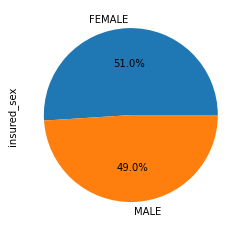

In [90]:
df.groupby(['fraud_reported']).get_group(1)['insured_sex'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')

array([<AxesSubplot:ylabel='insured_sex'>], dtype=object)

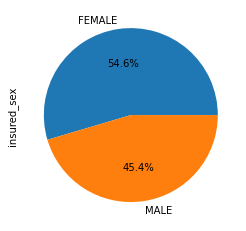

In [91]:
df.groupby(['fraud_reported']).get_group(0)['insured_sex'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%')

In [97]:
df.groupby(['fraud_reported']).get_group(1).groupby(['insured_sex','insured_education_level']).count()['total_claim_amount'].unstack(0)

insured_sex,FEMALE,MALE
insured_education_level,,
Associate,24,10
College,17,15
High School,14,22
JD,23,19
MD,14,24
Masters,17,15
PhD,17,16


In [98]:
df.groupby(['fraud_reported']).get_group(0).groupby(['insured_sex','insured_education_level']).count()['total_claim_amount'].unstack(0)

insured_sex,FEMALE,MALE
insured_education_level,,
Associate,61,50
College,47,43
High School,68,56
JD,63,56
MD,58,48
Masters,61,50
PhD,53,39


In [104]:
df.groupby(['collision_type','incident_severity','fraud_reported']).agg({'insured_sex':'count'}).unstack()

insured_sex    
fraud_reported                              0   1
collision_type  incident_severity                
?               Minor Damage               78  10
                Trivial Damage             84   6
Front Collision Major Damage               31  53
                Minor Damage               72   9
                Total Loss                 81   8
Rear Collision  Major Damage               35  61
                Minor Damage               88  12
                Total Loss                 78  18
Side Collision  Major Damage               43  53
                Minor Damage               78   7
                Total Loss                 85  10

In [107]:
df['incident_severity']=OrdinalEncoder().fit_transform(df['incident_severity'].to_numpy()[:,np.newaxis])
df['collision_type']=OrdinalEncoder().fit_transform(df['collision_type'].to_numpy()[:,np.newaxis])
df['insured_sex']=LabelBinarizer().fit_transform(df['insured_sex'])
df['insured_education_level']=OrdinalEncoder().fit_transform(df['insured_education_level'].to_numpy()[:,np.newaxis])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Claim_per,injury_per,property_per,vehicle_per
0,328,48,521585,17-10-2014,2.0,250/500,1000,1406.91,0,466132,...,52080,10.0,92x,9.0,1,NaN,1.0,0.091,0.182,0.727
1,228,42,342868,27-06-2006,1.0,250/500,2000,1197.22,5000000,468176,...,3510,8.0,E400,12.0,1,NaN,1.0,0.154,0.154,0.692
2,134,29,687698,06-09-2000,2.0,100/300,2000,1413.14,5000000,430632,...,23100,4.0,RAM,12.0,0,NaN,1.0,0.222,0.111,0.667
3,256,41,227811,25-05-1990,0.0,250/500,2000,1415.74,6000000,608117,...,50720,3.0,Tahoe,19.0,1,NaN,1.0,0.100,0.100,0.800
4,228,44,367455,06-06-2014,0.0,500/1000,1000,1583.91,6000000,610706,...,4550,0.0,RSX,14.0,0,NaN,1.0,0.200,0.100,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2.0,500/1000,1000,1310.80,0,431289,...,61040,6.0,Accord,11.0,0,NaN,1.0,0.200,0.100,0.700
996,285,41,186934,05-01-2014,0.0,100/300,1000,1436.79,0,608177,...,72320,13.0,Passat,20.0,0,NaN,1.0,0.167,0.167,0.667
997,130,34,918516,17-02-2003,2.0,250/500,500,1383.49,3000000,442797,...,52500,11.0,Impreza,1.0,0,NaN,1.0,0.111,0.111,0.778
998,458,62,533940,18-11-2011,0.0,500/1000,2000,1356.92,5000000,441714,...,36540,1.0,A5,3.0,0,NaN,1.0,0.111,0.111,0.778


In [110]:
df['insured_occupation']=OrdinalEncoder().fit_transform(df['insured_occupation'].to_numpy()[:,np.newaxis])

In [113]:
df.groupby(['fraud_reported','insured_hobbies']).count()['age'].unstack(0)

fraud_reported,0,1
insured_hobbies,,
base-jumping,36,13
basketball,28,6
board-games,34,14
bungie-jumping,47,9
camping,50,5
chess,8,38
cross-fit,9,26
dancing,38,5
exercise,46,11


In [126]:
df.groupby(['incident_city','fraud_reported']).agg({"fraud_reported":'count'}).unstack().sort_values(by=('fraud_reported',0))
# Each City has filed with 30% False claims

fraud_reported    
fraud_reported              0   1
incident_city                    
Northbrook                 95  27
Riverwood                 104  30
Hillsdale                 106  35
Arlington                 108  44
Columbus                  110  39
Northbend                 111  34
Springfield               119  38

In [128]:
df['incident_city']=OrdinalEncoder().fit_transform(df['incident_city'].to_numpy()[:,np.newaxis])

In [129]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'Claim_per',
       'injury_per', 'property_per', 'vehicle_per'],
      dtype='object')

In [138]:
cln=df.loc[:,['age','policy_state','policy_annual_premium','insured_sex',
       'insured_education_level', 'insured_occupation','collision_type', 'incident_severity','incident_city',
         'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
         'auto_year', 'fraud_reported']]
cln.dtypes

age                              int64
policy_state                   float64
policy_annual_premium          float64
insured_sex                      int32
insured_education_level        float64
insured_occupation             float64
collision_type                 float64
incident_severity              float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available        float64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_make                      float64
auto_year                      float64
fraud_reported                   int32
dtype: object

In [141]:
accuracy_list=[]
roc_list=[]

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
X=cln.iloc[:,:-1]
y=cln['fraud_reported']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
for model in [RandomForestClassifier(),LogisticRegression(solver='liblinear'),SGDClassifier()]:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    roc_list.append(roc_auc_score(y_test,y_pred))

In [142]:
accuracy_list

[0.772, 0.732, 0.732]

In [143]:
roc_list

[0.6597748960117444, 0.5, 0.5]

In [ ]:
#Kindly select RandomForestRegressor having good Roc_auc_score